## Setup 

In [37]:
import pandas as pd
import numpy as np
import IPython
import math
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter('ignore', UserWarning)

In [38]:
train_data = pd.read_csv('train_age_dataset.csv', index_col=None)
train_data = train_data.iloc[:,2:]

In [39]:
train_data.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [40]:
features = train_data.iloc[:,:-1]

## Segregating features

We shall first separate the features into numerical and categorical to apply analysis separately.

In [41]:
features.nunique()

tier                                    3
gender                                  2
following_rate                      15453
followers_avg_age                    3495
following_avg_age                    3949
max_repetitive_punc                    95
num_of_hashtags_per_action            420
emoji_count_per_action                742
punctuations_per_action              3129
number_of_words_per_action          16664
avgCompletion                      458839
avgTimeSpent                        98838
avgDuration                        415696
avgComments                           186
creations                            9972
content_views                       32292
num_of_comments                      3881
weekends_trails_watched_per_day     20340
weekdays_trails_watched_per_day     31432
slot1_trails_watched_per_day        11765
slot2_trails_watched_per_day        20220
slot3_trails_watched_per_day        21783
slot4_trails_watched_per_day        22160
avgt2                             

In [42]:
cat_cols = features.columns[features.nunique()<4].to_list()

In [43]:
num_cols = list(set(features.columns)-set(cat_cols))

In [44]:
print("numerical columns     =    {}\n".format(num_cols))
print("categorical columns   =    {}\n".format(cat_cols))

numerical columns     =    ['followers_avg_age', 'num_of_hashtags_per_action', 'weekdays_trails_watched_per_day', 'content_views', 'following_avg_age', 'avgTimeSpent', 'max_repetitive_punc', 'following_rate', 'slot1_trails_watched_per_day', 'weekends_trails_watched_per_day', 'slot2_trails_watched_per_day', 'slot3_trails_watched_per_day', 'emoji_count_per_action', 'slot4_trails_watched_per_day', 'number_of_words_per_action', 'avgDuration', 'avgComments', 'avgCompletion', 'num_of_comments', 'avgt2', 'punctuations_per_action', 'creations']

categorical columns   =    ['tier', 'gender']



## Hot Encoding

We shall now apply one hot encoding on the categorical columns and drop the first new column generated to remove redundant information.

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(handle_unknown='error',sparse=False, drop="first")
encoded_cols = pd.DataFrame(encoder.fit_transform(features[cat_cols]))

In [47]:
encoded_cols.columns = ['tier2','tier3','female']

In [48]:
encoded_cols = encoded_cols.astype(np.int64, copy=False)
encoded_cols

,tier2,tier3,female
0,1,0,0
1,1,0,1
2,1,0,0
3,1,0,0
4,1,0,1
...,...,...,...
488872,1,0,1
488873,0,0,0
488874,0,0,0
488875,1,0,0


## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler(copy=False)

In [50]:
scaled_cols = pd.DataFrame(num_scaler.fit_transform(features[num_cols]))

In [51]:
scaled_cols.columns = num_cols
scaled_cols

,followers_avg_age,num_of_hashtags_per_action,weekdays_trails_watched_per_day,content_views,following_avg_age,avgTimeSpent,max_repetitive_punc,following_rate,slot1_trails_watched_per_day,weekends_trails_watched_per_day,...,emoji_count_per_action,slot4_trails_watched_per_day,number_of_words_per_action,avgDuration,avgComments,avgCompletion,num_of_comments,avgt2,punctuations_per_action,creations
0,-0.425708,-0.022681,-0.239871,-0.210993,-0.435592,-0.001347,-0.240494,-0.033323,-0.169388,-0.154841,...,-0.048151,-0.249069,-0.276638,-0.379119,-0.041952,0.622942,-0.065725,-0.167788,-0.080256,-0.094595
1,-0.425708,-0.022681,-0.276234,-0.328943,-0.435592,-0.001688,-0.240494,-0.033323,-0.169388,-0.292007,...,-0.048151,-0.247944,-0.039070,0.170970,-0.041952,0.449679,-0.065725,-0.083775,0.401860,-0.047619
2,-0.425708,-0.022681,-0.379712,-0.428837,-0.435592,-0.001566,-0.240494,-0.033323,-0.169388,-0.352226,...,-0.048151,-0.315462,-0.276638,-0.000693,-0.041952,0.000385,-0.065725,-0.167788,-0.080256,-0.094595
3,-0.425708,-0.022681,-0.373284,-0.422632,-0.435592,-0.001910,-0.240494,-0.033323,-0.169388,-0.352226,...,-0.048151,-0.298724,-0.276638,5.730375,-0.041952,-1.718402,-0.065725,-0.167788,-0.080256,-0.094595
4,-0.425708,-0.022681,-0.101532,-0.205561,-0.435592,-0.001741,-0.240494,-0.033323,-0.169388,-0.352226,...,-0.048151,0.043711,-0.276638,-0.382107,-0.041952,0.588242,-0.065725,-0.167788,-0.080256,-0.094595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,-0.425708,-0.022681,-0.346284,-0.361219,-0.435592,-0.001806,-0.240494,-0.033323,-0.169388,-0.295379,...,-0.048151,-0.219856,0.186619,-0.342819,-0.041952,0.415754,-0.065725,0.030789,-0.080256,-0.050250
488873,-0.425708,-0.022681,1.560311,1.824904,-0.435592,-0.001320,-0.240494,-0.026336,0.186175,1.077109,...,-0.048151,2.019723,-0.257807,-0.183297,0.219492,1.672685,0.498442,0.024417,-0.080256,0.192120
488874,1.564900,-0.022681,0.292381,0.020792,1.996078,-0.001721,-0.240494,0.059679,-0.169388,-0.352226,...,-0.048151,0.288601,-0.130960,-0.423202,-0.041952,1.215870,-0.065725,0.020483,-0.080256,-0.003723
488875,-0.425708,-0.022681,-0.206149,-0.306187,-0.435592,-0.001791,-0.240494,-0.033323,-0.169388,-0.352226,...,-0.048151,-0.315462,-0.276638,0.626255,-0.041952,-0.615425,-0.065725,-0.167788,-0.080256,-0.094595


## Heatmap


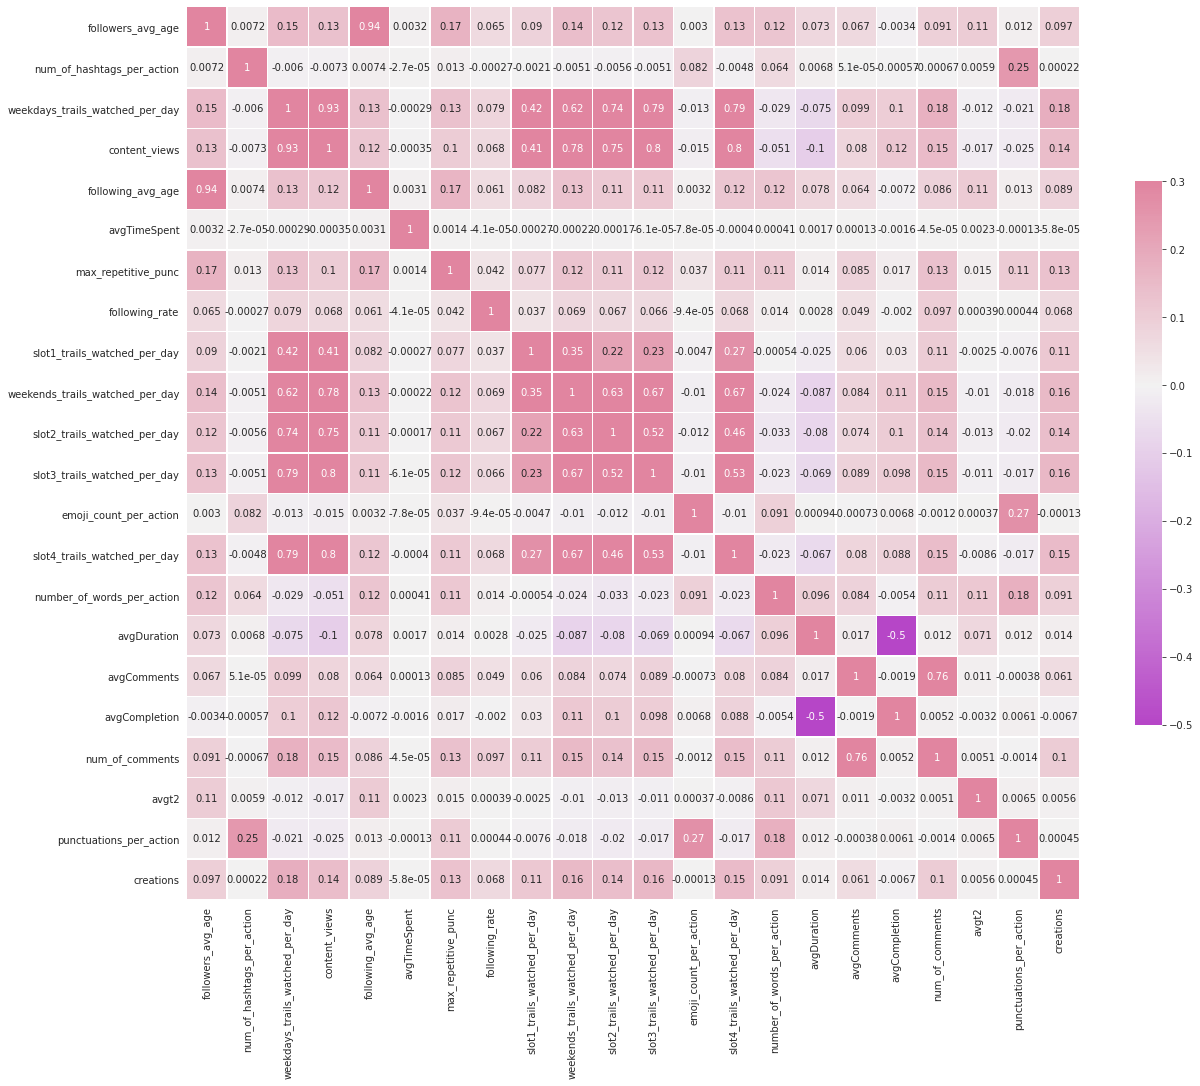

In [52]:
corr_matrix = scaled_cols.corr()
cmap = sns.diverging_palette(300, 0, as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

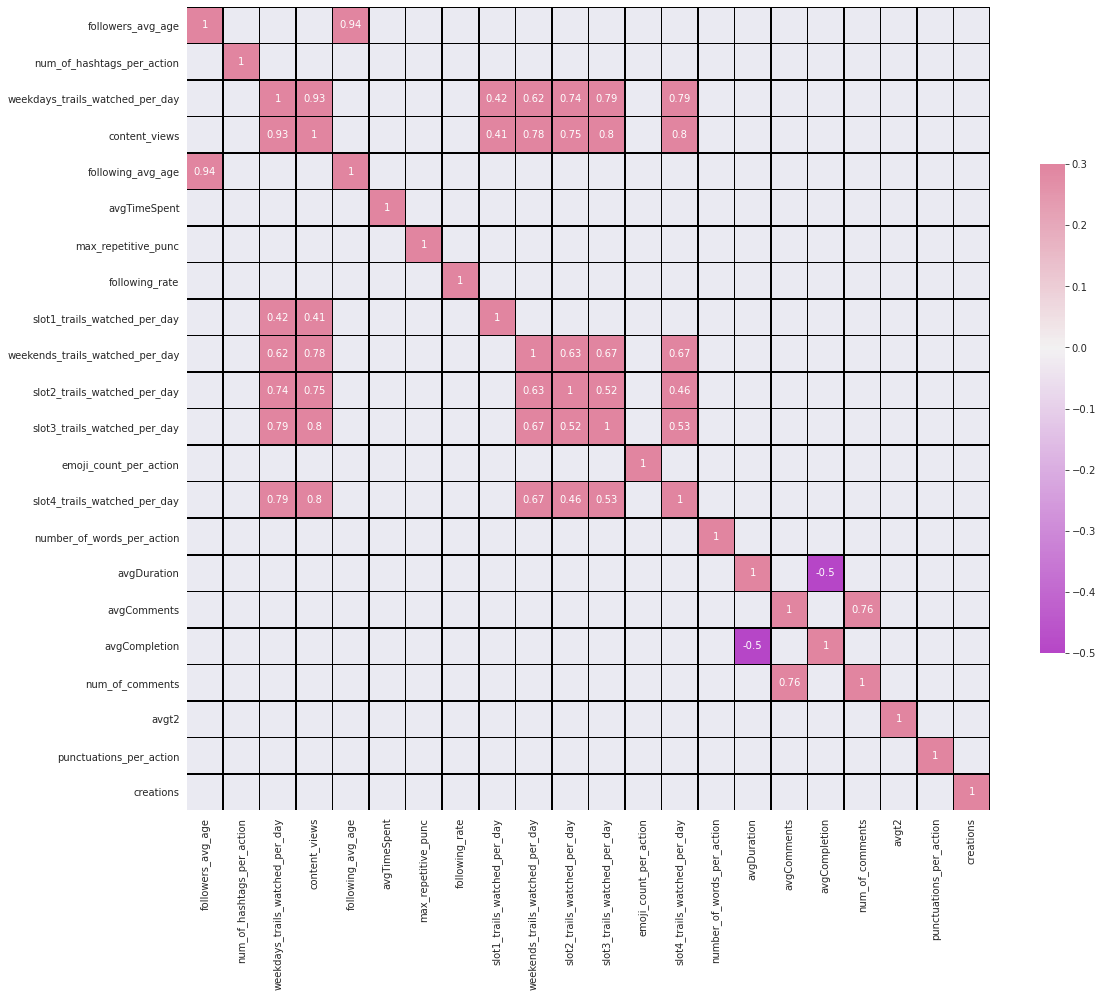

In [53]:
#creating a mask to display values in selected cells only
pos_cor = np.array(corr_matrix > 0.4, dtype = np.int64)
neg_cor = np.array(corr_matrix < -0.3, dtype = np.int64)
mask = pos_cor + neg_cor
mask = (mask==0)

corr_matrix = scaled_cols.corr()
cmap = sns.diverging_palette(300, 0, as_cmap=True)
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0, linecolor='black',
            square=True, annot=True, mask = mask, linewidths=0.5, cbar_kws={"shrink": .5})
plt.show()


In [54]:
data_pair = pd.concat([scaled_cols, train_data['age_group']], axis=1)
data_pair.head()

,followers_avg_age,num_of_hashtags_per_action,weekdays_trails_watched_per_day,content_views,following_avg_age,avgTimeSpent,max_repetitive_punc,following_rate,slot1_trails_watched_per_day,weekends_trails_watched_per_day,...,slot4_trails_watched_per_day,number_of_words_per_action,avgDuration,avgComments,avgCompletion,num_of_comments,avgt2,punctuations_per_action,creations,age_group
0,-0.425708,-0.022681,-0.239871,-0.210993,-0.435592,-0.001347,-0.240494,-0.033323,-0.169388,-0.154841,...,-0.249069,-0.276638,-0.379119,-0.041952,0.622942,-0.065725,-0.167788,-0.080256,-0.094595,1
1,-0.425708,-0.022681,-0.276234,-0.328943,-0.435592,-0.001688,-0.240494,-0.033323,-0.169388,-0.292007,...,-0.247944,-0.039070,0.170970,-0.041952,0.449679,-0.065725,-0.083775,0.401860,-0.047619,2
2,-0.425708,-0.022681,-0.379712,-0.428837,-0.435592,-0.001566,-0.240494,-0.033323,-0.169388,-0.352226,...,-0.315462,-0.276638,-0.000693,-0.041952,0.000385,-0.065725,-0.167788,-0.080256,-0.094595,1
3,-0.425708,-0.022681,-0.373284,-0.422632,-0.435592,-0.001910,-0.240494,-0.033323,-0.169388,-0.352226,...,-0.298724,-0.276638,5.730375,-0.041952,-1.718402,-0.065725,-0.167788,-0.080256,-0.094595,1
4,-0.425708,-0.022681,-0.101532,-0.205561,-0.435592,-0.001741,-0.240494,-0.033323,-0.169388,-0.352226,...,0.043711,-0.276638,-0.382107,-0.041952,0.588242,-0.065725,-0.167788,-0.080256,-0.094595,1


## Removing Outliers

### Z-score

In [19]:
from scipy import stats

z = np.abs(stats.zscore(features[num_cols]))
z

array([[0.0481508 , 0.21099345, 0.35196482, ..., 0.04195174, 0.02268129,
        0.42570817],
       [0.0481508 , 0.3289426 , 0.14147486, ..., 0.04195174, 0.02268129,
        0.42570817],
       [0.0481508 , 0.42883719, 0.34504621, ..., 0.04195174, 0.02268129,
        0.42570817],
       ...,
       [0.0481508 , 0.02079212, 0.22981163, ..., 0.04195174, 0.02268129,
        1.5649003 ],
       [0.0481508 , 0.30618689, 0.29138479, ..., 0.04195174, 0.02268129,
        0.42570817],
       [0.0481508 , 0.35108946, 0.35196482, ..., 0.04195174, 0.02268129,
        0.42570817]])

In [20]:
data_num_zscore = data_pair[num_cols][(z<3).all(axis=1)]

### Inter quartile range

In [21]:
Q1 = data_pair[num_cols].quantile(0.25)
Q3 = data_pair[num_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

emoji_count_per_action             0.000000
content_views                      0.357710
slot2_trails_watched_per_day       0.291068
following_rate                     0.003493
punctuations_per_action            0.000000
following_avg_age                  0.000000
avgDuration                        1.061774
weekdays_trails_watched_per_day    0.324680
slot3_trails_watched_per_day       0.262488
slot1_trails_watched_per_day       0.000000
max_repetitive_punc                0.000000
number_of_words_per_action         0.231912
slot4_trails_watched_per_day       0.243785
creations                          0.050392
avgt2                              0.181944
avgCompletion                      1.334499
num_of_comments                    0.000000
weekends_trails_watched_per_day    0.284233
avgTimeSpent                       0.000134
avgComments                        0.000000
num_of_hashtags_per_action         0.000000
followers_avg_age                  0.000000
dtype: float64

In [22]:
(data_pair[num_cols] < (Q1 - 1.5 * IQR)) |(data_pair[num_cols] > (Q3 + 1.5 * IQR))

,emoji_count_per_action,content_views,slot2_trails_watched_per_day,following_rate,punctuations_per_action,following_avg_age,avgDuration,weekdays_trails_watched_per_day,slot3_trails_watched_per_day,slot1_trails_watched_per_day,...,slot4_trails_watched_per_day,creations,avgt2,avgCompletion,num_of_comments,weekends_trails_watched_per_day,avgTimeSpent,avgComments,num_of_hashtags_per_action,followers_avg_age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
488873,False,True,True,False,False,False,False,True,False,True,...,True,True,False,False,True,True,True,True,False,False
488874,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
488875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
data_num_iqr = data_pair[num_cols][~((data_pair[num_cols] < (Q1 - 3 * IQR)) |(data_pair[num_cols] > (Q3 + 3 * IQR))).any(axis=1)]

z score ke saath hi aage badhte hai:)

## Scatterplots

In [114]:
#yaha par sirf numerical columns hi liye hai kyunki plot krna tha, tuin poora dataframe liyo categorical+numerical+age_group

data_pair_zsc = data_pair.loc[data_num_zscore.index]
data_pair_zsc.reset_index(drop=True, inplace=True)

In [115]:
num_cols

['emoji_count_per_action',
 'content_views',
 'slot2_trails_watched_per_day',
 'following_rate',
 'punctuations_per_action',
 'following_avg_age',
 'avgDuration',
 'weekdays_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot1_trails_watched_per_day',
 'max_repetitive_punc',
 'number_of_words_per_action',
 'slot4_trails_watched_per_day',
 'creations',
 'avgt2',
 'avgCompletion',
 'num_of_comments',
 'weekends_trails_watched_per_day',
 'avgTimeSpent',
 'avgComments',
 'num_of_hashtags_per_action',
 'followers_avg_age']

In [116]:
data_pair_zsc.shape

(426069, 23)

------------------Plot with following_avg_age ---------------------- 


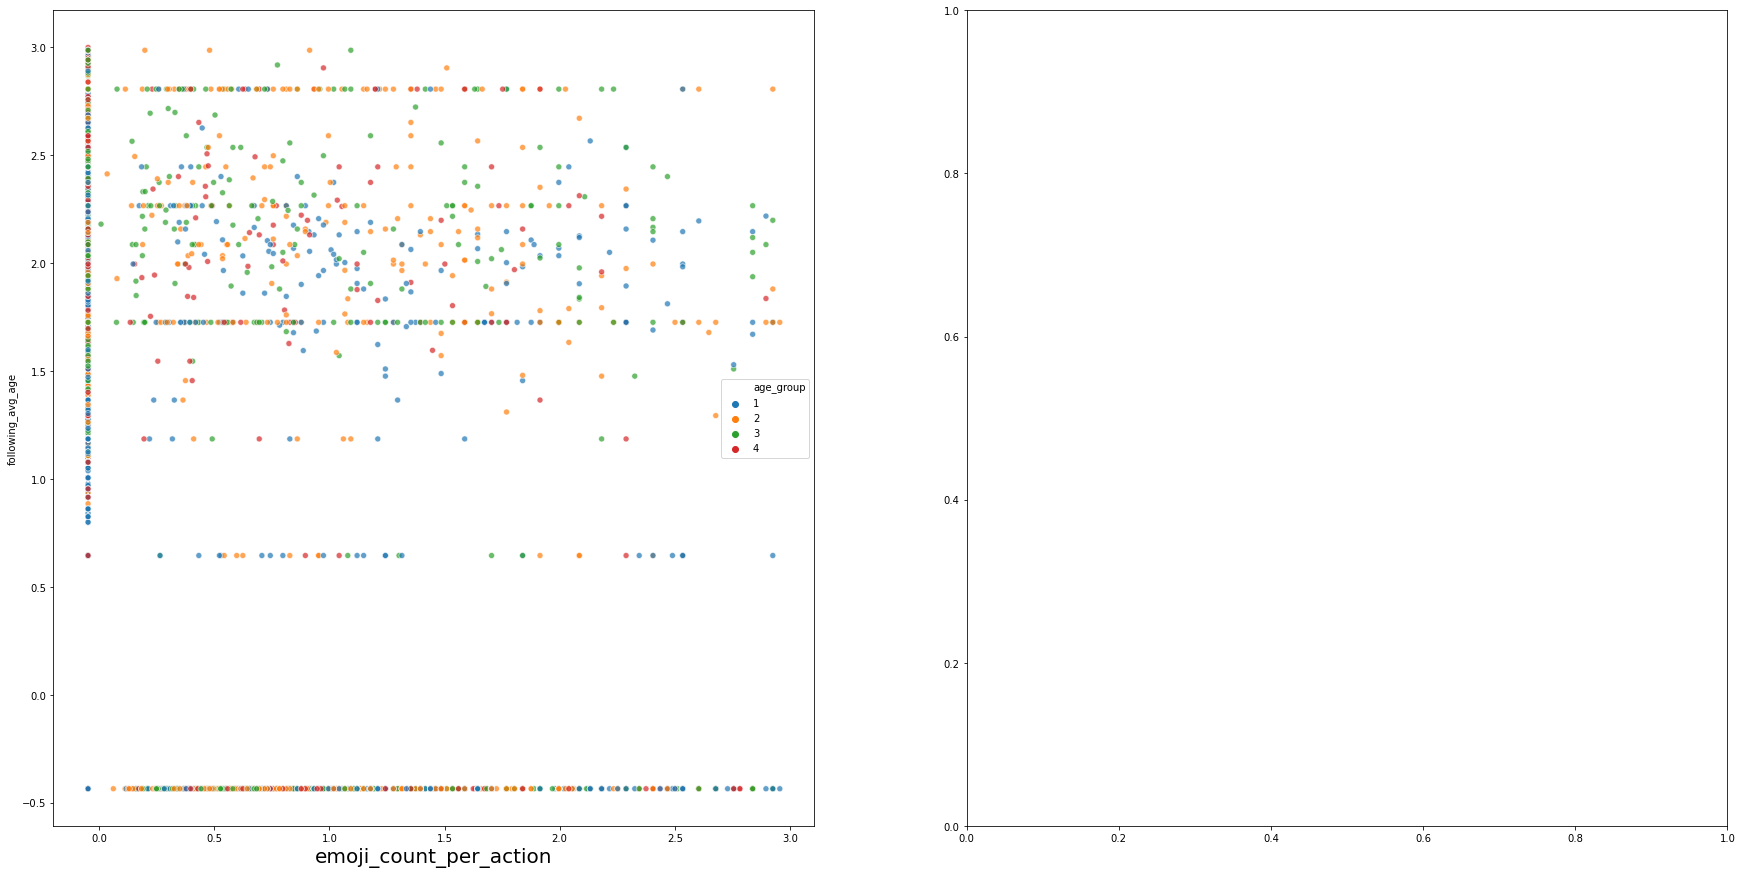

In [98]:
i=20
j=i+1
print("------------------Plot with "+data_pair_zsc.columns[i]+" ---------------------- ")
rows = math.ceil((len(num_cols)-1-i)/2)
fig, axes = plt.subplots(rows, 2, figsize=(30,15*rows))
for __, ax in enumerate(fig.axes):
    #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.set_xlabel(data_pair_zsc.columns[j], fontsize=20)
    ax.set_ylabel(None)
    sns.scatterplot(data=data_pair_zsc, x=data_pair_zsc.columns[j], y=data_pair_zsc.columns[i],
                    palette='tab10', hue='age_group', alpha=0.7, ax=ax)
    j+=1
    if j==len(num_cols): break
plt.show()
fig.tight_layout()

what i found useful

avg duration vs avgcompletion

avg duration vs slot4_trails_watched_per_day

content views vs slot4_trails_watched_per_day

weekday_trails_watched_per_day vs avg duration

content views vs avg duration

weekends_trails_watched_per_day vs avgduration

slot3_trails_watched_per_day vs avg duration

slot2_trails_watched_per_day vs avg duration

content views vs punctuations_per_action


## Histograms

In [35]:
sns.set_style("darkgrid")

In [36]:
numerical_data = pd.DataFrame(num_scaler.fit_transform(data_pair_zsc[num_cols]))
numerical_data

NameError: name 'num_scaler' is not defined

In [119]:
numerical_data.columns = num_cols


In [34]:
for col in skewed_cols:
    sns.displot(numerical_data[col], kind='kde', fill=True, height = 5, bw_adjust=0.8)

NameError: name 'numerical_data' is not defined

In [33]:
skewed_cols = ['num_of_comments','emoji_count_per_action','following_rate','punctuations_per_action','avgTimeSpent','num_of_hashtags_per_action']

In [122]:
non_skewed_cols = list(set(num_cols)-set(skewed_cols))

In [123]:
non_skewed_cols

['content_views',
 'weekends_trails_watched_per_day',
 'slot2_trails_watched_per_day',
 'avgDuration',
 'weekdays_trails_watched_per_day',
 'following_avg_age',
 'slot3_trails_watched_per_day',
 'slot1_trails_watched_per_day',
 'max_repetitive_punc',
 'number_of_words_per_action',
 'slot4_trails_watched_per_day',
 'creations',
 'avgt2',
 'avgComments',
 'avgCompletion',
 'followers_avg_age']

In [124]:
skewed_cols

['num_of_comments',
 'emoji_count_per_action',
 'following_rate',
 'punctuations_per_action',
 'avgTimeSpent',
 'num_of_hashtags_per_action']

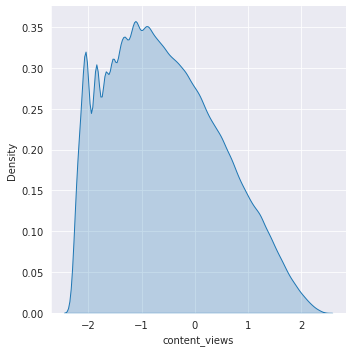

In [125]:
sns.displot(np.log(1+numerical_data[non_skewed_cols[0]]/0.8), kind='kde', fill=True, height = 5,bw_adjust=0.8)

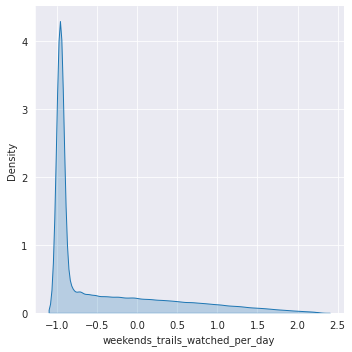

In [126]:
sns.displot(np.log(1+numerical_data[non_skewed_cols[1]]/0.8), kind='kde', fill=True, height = 5,bw_adjust=0.8)

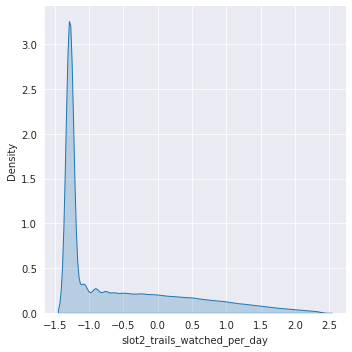

In [127]:
sns.displot(np.log(1+numerical_data[non_skewed_cols[2]]/0.7), kind='kde', fill=True, height = 5,bw_adjust=0.8)

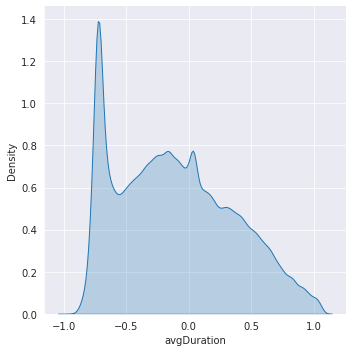

In [128]:
sns.displot(np.log(1+numerical_data[non_skewed_cols[3]]/2), kind='kde', fill=True, height = 5,bw_adjust=0.8)

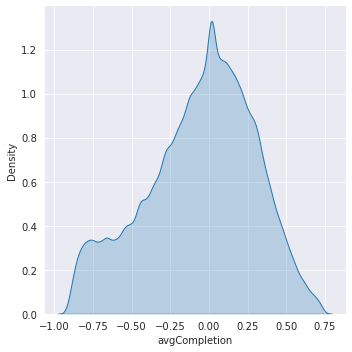

In [129]:
sns.displot(np.log(1+numerical_data['avgCompletion']/3), kind='kde', fill=True, height = 5,bw_adjust=0.8)

In [ ]:
np.log(1+numerical_data['content_views']/0.8)
np.log(1+numerical_data['weekends_trails_watched_per_day']/0.8)
np.log(1+numerical_data['slot2_trails_watched_per_day']/0.7)
np.log(1+numerical_data['avgDuration']/2)
np.log(1+numerical_data['avgCompletion']/3)

In [130]:
for col in skewed_cols:
    print(numerical_data[col].value_counts())

-0.198652    395581
 1.580476      2339
 1.566356      1979
 1.609405      1653
 1.624225      1377
              ...  
 2.883996         1
 5.894253         1
 3.908834         1
 4.606093         1
 2.713611         1
Name: num_of_comments, Length: 2262, dtype: int64
-0.055163     424373
 29.694938        39
 25.232423        39
 20.174906        37
 21.017826        36
               ...  
 6.456662          1
 5.533254          1
 9.196393          1
 3.186835          1
 10.162044         1
Name: emoji_count_per_action, Length: 335, dtype: int64
-0.156368    288010
-0.118681      4599
-0.118980      3350
-0.118068      2915
-0.117754      2522
              ...  
 0.033057         1
 3.887174         1
 0.041155         1
 0.010935         1
 0.442151         1
Name: following_rate, Length: 10887, dtype: int64
-0.142474     409592
 6.855363        350
 8.604822        345
 11.520588       297
 4.231174        295
               ...  
 0.094741          1
-0.038029          1
 1.50

In [131]:
plot_data = pd.concat([numerical_data,data_pair_zsc['age_group']],axis=1)

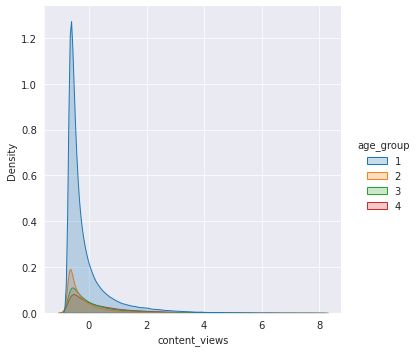

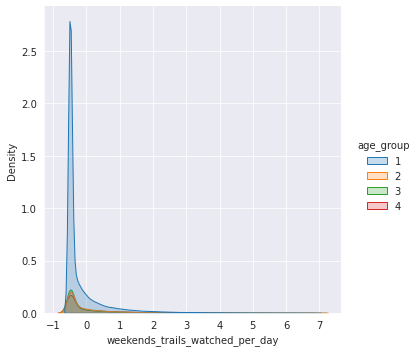

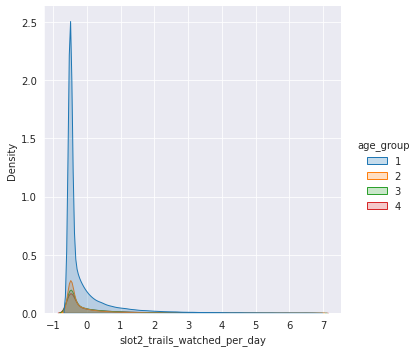

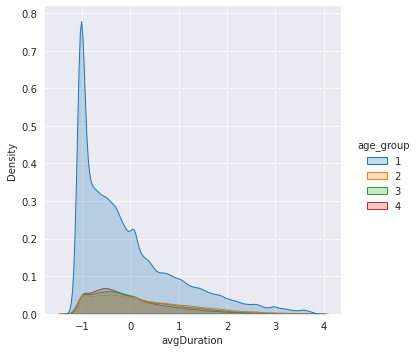

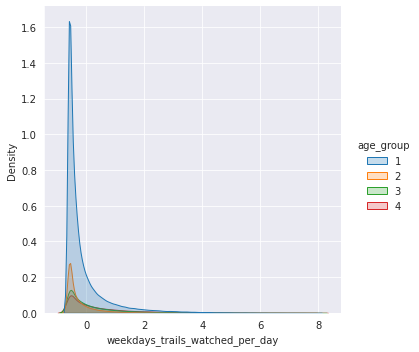

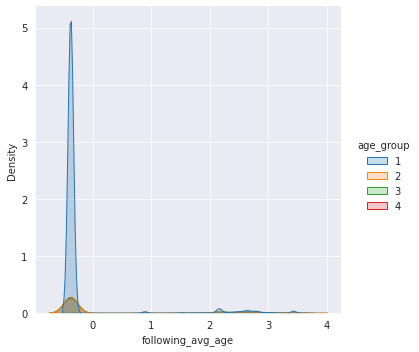

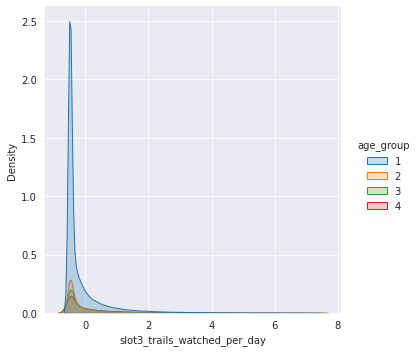

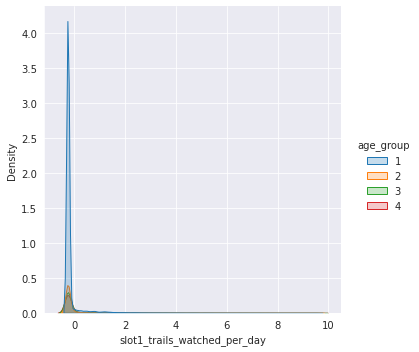

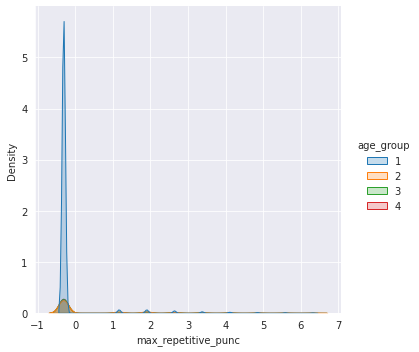

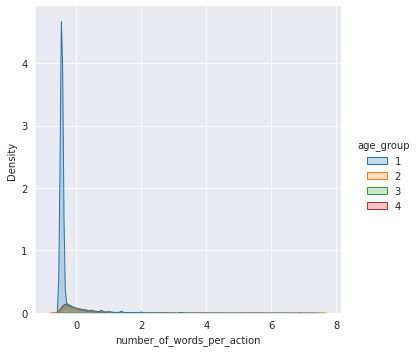

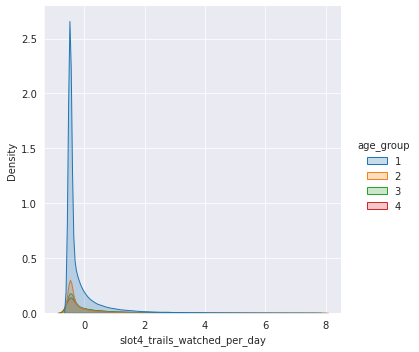

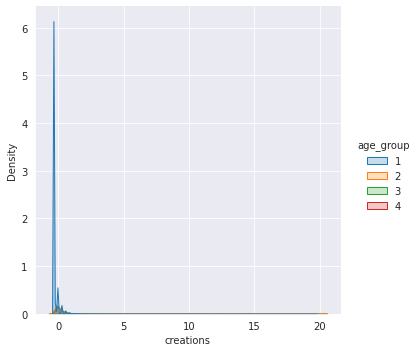

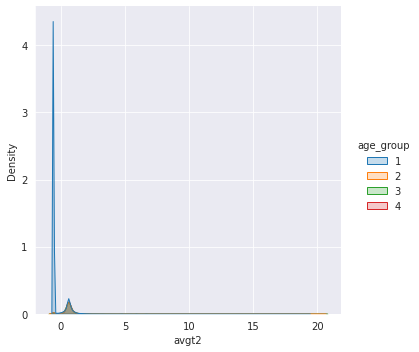

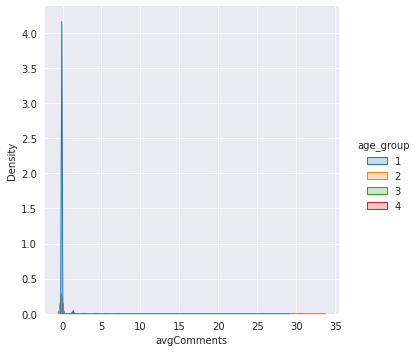

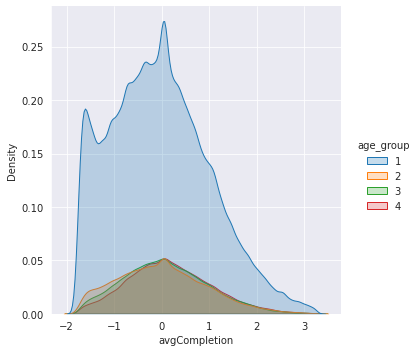

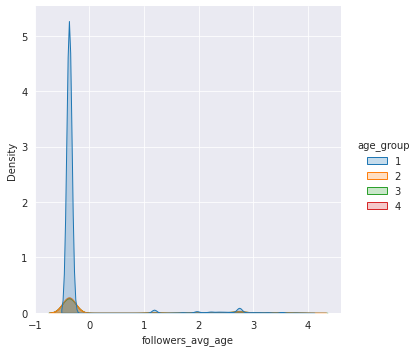

In [137]:
for col in non_skewed_cols:
    sns.displot(data = plot_data, x=col, kind='kde',hue='age_group', fill=True, height = 5, bw_adjust=0.8, palette='tab10')

In [136]:
plot_data.shape

(426069, 23)